<a href="https://colab.research.google.com/github/Miss-Pradhi/ML-LAB-Assignment/blob/main/LAB-8_clustering_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.xlsx - Mall_Customers.csv to Mall_Customers.xlsx - Mall_Customers.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering


In [ ]:
df = pd.read_csv("Mall_Customers.xlsx - Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


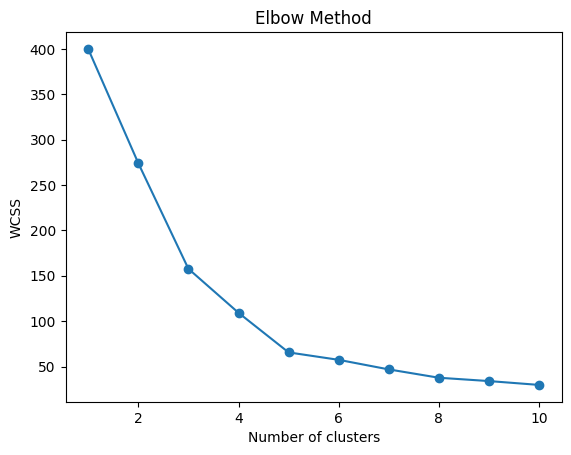

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, n_init='auto')
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_KMeans
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


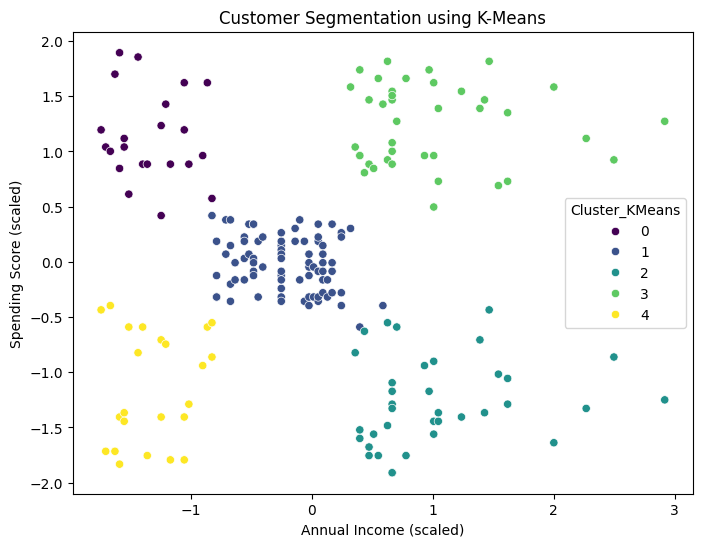

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_scaled[:,0], y=X_scaled[:,1],
    hue=df['Cluster_KMeans'], palette='viridis'
)
plt.title("Customer Segmentation using K-Means")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()


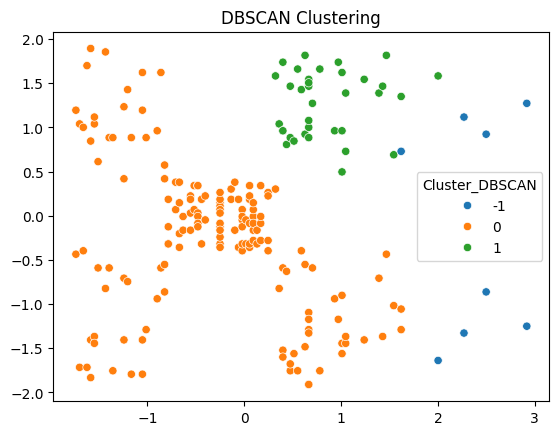

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

sns.scatterplot(
    x=X_scaled[:,0], y=X_scaled[:,1],
    hue=df['Cluster_DBSCAN'], palette='tab10'
)
plt.title("DBSCAN Clustering")
plt.show()


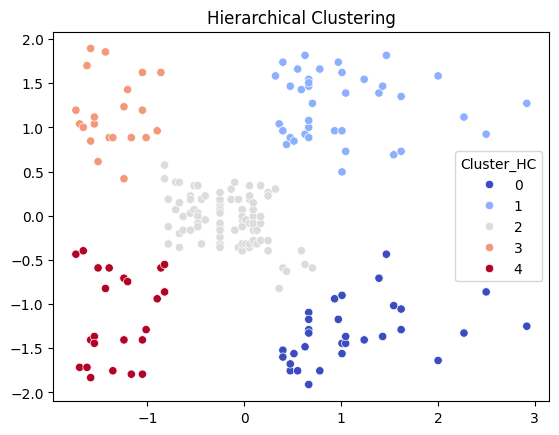

In [ ]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Cluster_HC'] = hc.fit_predict(X_scaled)

sns.scatterplot(
    x=X_scaled[:,0], y=X_scaled[:,1],
    hue=df['Cluster_HC'], palette='coolwarm'
)
plt.title("Hierarchical Clustering")
plt.show()


In [ ]:
df.to_csv("Clustered_Customers.csv", index=False)


In [ ]:
files.download("Clustered_Customers.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>